In [1]:
import json
import os
import random

import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np

In [2]:
def load_mri_modalities(folder):
    channels = []
    for i in range(4):  # T1c, T2, FLAIR
        nii_path = os.path.join(folder, f"{os.path.basename(folder)}_000{i}.nii.gz")
        vol = nib.load(nii_path).get_fdata()
        vol = vol.astype(np.float32)
        vol = (vol - vol.mean()) / (vol.std() + 1e-8)

        channels.append(vol[np.newaxis])
    return np.concatenate(channels, axis=0)

In [3]:
def visualize_patient_volume(volume, title_prefix="Baseline"):
    """
    volume: numpy array of shape (4, D, H, W)
    """
    num_modalities = volume.shape[0]
    mid_slice = volume.shape[1] // 2  # Axial slice at middle depth

    modality_names = ['T1', 'T1c', 'T2', 'FLAIR']
    fig, axes = plt.subplots(1, num_modalities, figsize=(16, 4))

    for i in range(num_modalities):
        axes[i].imshow(volume[i, mid_slice, :, :], cmap='gray')
        axes[i].set_title(f"{title_prefix} - {modality_names[i]}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()


In [4]:
with open("../data/patients.json") as f:
    data = json.load(f)

samples = []
for patient_id, cases in data.items():
    for case_id, case_data in cases.items():
        if "response" in case_data:
            samples.append((patient_id, case_id, case_data))

len(samples)

361

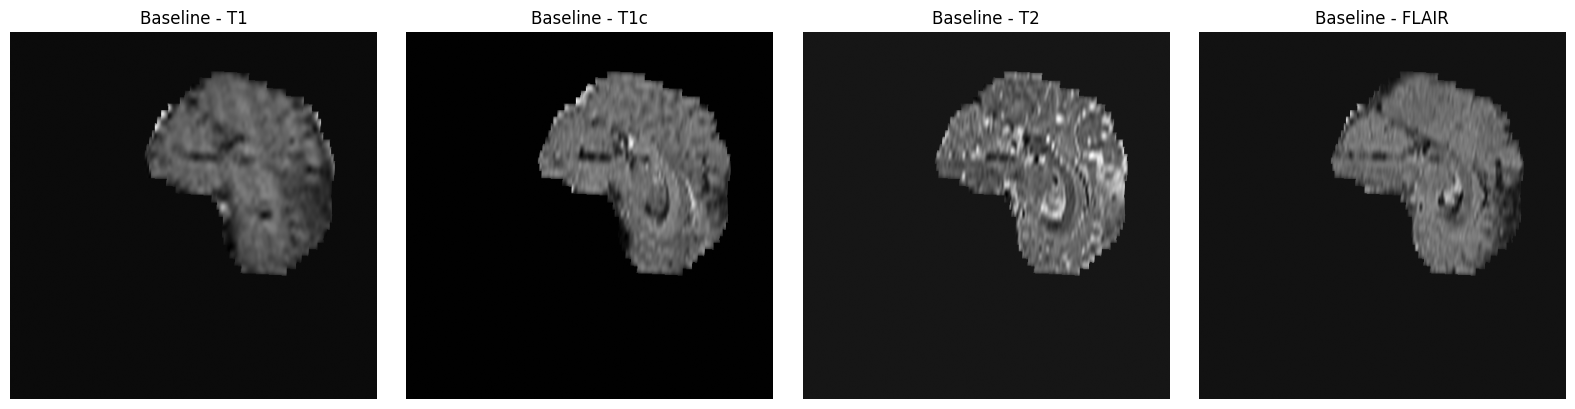

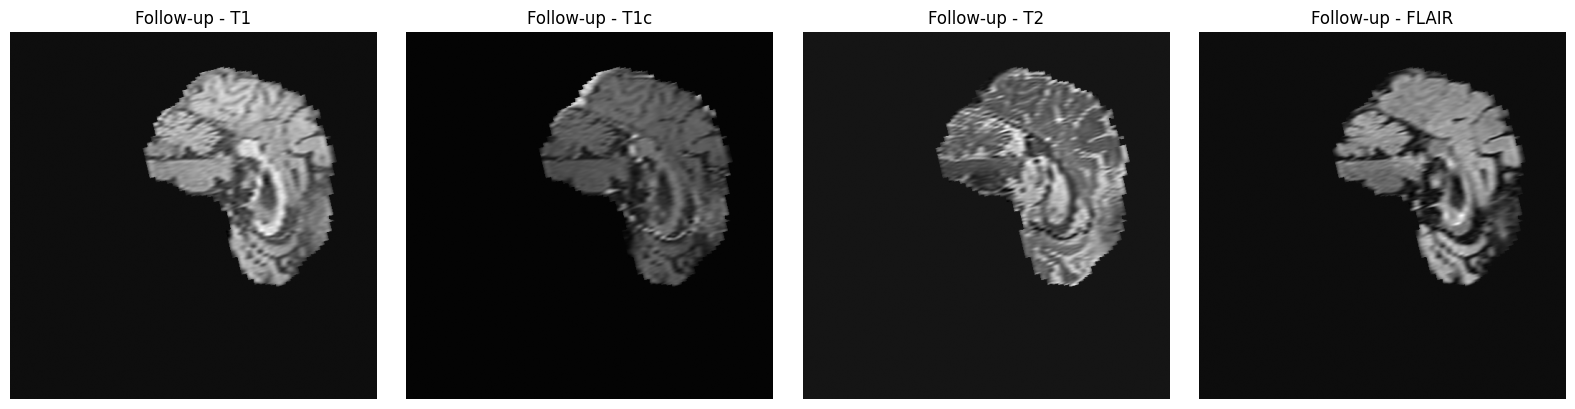

In [5]:
idx = random.randint(0, len(samples) - 1)
patient_id, case_id, case_data = samples[idx]

baseline_path = os.path.join("../data", case_data["baseline_registered"])
followup_path = os.path.join("../data", case_data["followup_registered"])

baseline_vol = load_mri_modalities(baseline_path)
followup_vol = load_mri_modalities(followup_path)

visualize_patient_volume(baseline_vol, title_prefix="Baseline")
visualize_patient_volume(followup_vol, title_prefix="Follow-up")